# Nama : Willibrordus Bayu
# NIM : 00000034000
# Kelas : B


In [152]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

## Modul 1 - 12

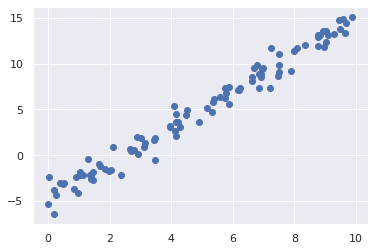

In [153]:
#visualize dataset using scatter plot
dataset = np.random.RandomState(1)
x = 10 * dataset.rand(100)
y = 2 * x - 5 + dataset.randn(100)
plt.scatter(x,y)

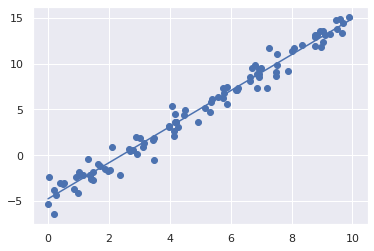

In [154]:
#build linear regression model
lr = LinearRegression(fit_intercept = True)
lr.fit(x[:, np.newaxis],y)

#predict model
xfit = np.linspace(0,10,1000)
yfit = lr.predict(xfit[:, np.newaxis])

#visualize model
plt.scatter(x,y)
plt.plot(xfit, yfit);

In [155]:
#print model 
print("Model slope:", lr.coef_[0])
print("Model intecept:", lr.intercept_)

Model slope: 1.9684925087655323
Model intecept: -4.763042745851093


In [156]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

lr.fit(X, y)
print(lr.intercept_)
print(lr.coef_)

0.5000000000000051
[ 1.5 -2.   1. ]


In [157]:
#polynomial basis function
x = np.array([98,99,100])
poly = PolynomialFeatures(3, include_bias = False)
poly.fit_transform(x[:, None])

array([[9.80000e+01, 9.60400e+03, 9.41192e+05],
       [9.90000e+01, 9.80100e+03, 9.70299e+05],
       [1.00000e+02, 1.00000e+04, 1.00000e+06]])

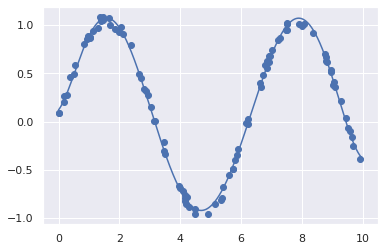

In [158]:
#build pipeline of polynomial features
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())
rng = np.random.RandomState(1)
x = 10 * rng.rand(100)
y = np.sin(x) + 0.1 * rng.rand(100)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x,y)
plt.plot(xfit, yfit)

(0.0, 10.0)

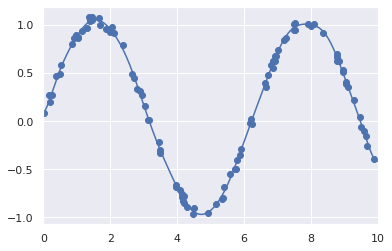

In [159]:
class GaussianFeatures(BaseEstimator, TransformerMixin):
    
    def __init__(self, N, width_factor = 2.0):
        self.N = N
        self.width_factor = width_factor
        
    @staticmethod
    def _gauss_basis(x, y, width, axis = None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    
    def fit(self, X, y = None):
        #membuat center dari N menyebar seperti range pada data
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis = 1)
    
gauss_model = make_pipeline(GaussianFeatures(20), LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10)

(-1.5, 1.5)

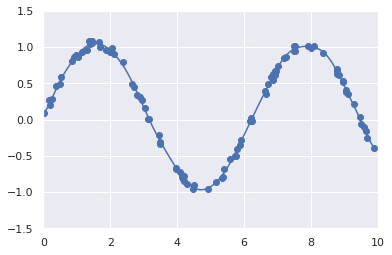

In [160]:
#build pipeline of gaussian features
model = make_pipeline(GaussianFeatures(20), LinearRegression())
model.fit(x[:, np.newaxis], y)

#visualize the pipeline
plt.scatter(x,y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)

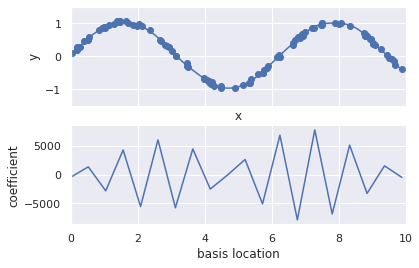

In [161]:
#define function to visualize basis plot
def basis_plot(model, title = None):
    fig, ax = plt.subplots(2, sharex = True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel = 'x', ylabel = 'y', ylim = (-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)
    ax[1].plot(model.steps[0][1].centers_, model.steps[1][1].coef_,)
    ax[1].set(xlabel = 'basis location', ylabel = 'coefficient', xlim = (0,10))
    
model = make_pipeline(GaussianFeatures(20), LinearRegression())
basis_plot(model)

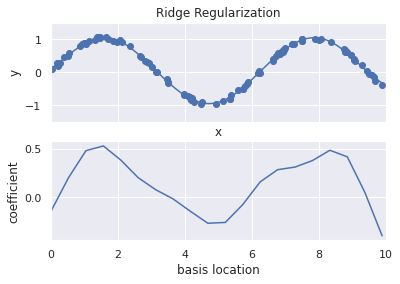

In [162]:
#ridge regularization / L2 / tikhonov regularization
model = make_pipeline(GaussianFeatures(20), Ridge(alpha = 0.1))
basis_plot(model, title = 'Ridge Regularization')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.824e-03, tolerance: 4.129e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


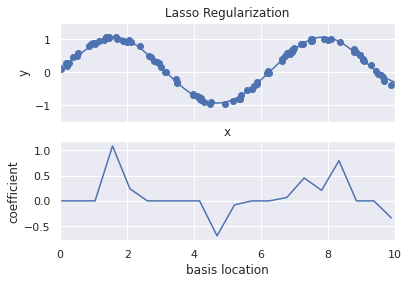

In [163]:
#lasso regularization / L1
model = make_pipeline(GaussianFeatures(20), Lasso(alpha = (0.001)))
basis_plot(model, title = 'Lasso Regularization')

## Modul 13 - 25

In [164]:
#import library
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
import graphviz

### Retail Sales Forecasting

In [165]:
#load dataset
df_retail = pd.read_csv('/content/mock_kaggle.csv', parse_dates = True)
df_retail.head()

,data,venda,estoque,preco
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29


In [166]:
#rename variable of dataset
df_retail = df_retail.rename(columns = {'data' : 'date', 'venda' : 'sales', 'estoque' : 'supply', 'preco' : 'price'})
df_retail = df_retail.set_index('date')
df_retail.head()

,sales,supply,price
date,,,
2014-01-01,0,4972,1.29
2014-01-02,70,4902,1.29
2014-01-03,59,4843,1.29
2014-01-04,93,4750,1.29
2014-01-05,96,4654,1.29


In [167]:
#check missing value
df_retail.isnull().sum()

sales     0
supply    0
price     0
dtype: int64

In [168]:
#split data
column_names = ['sales', 'price']
X = df_retail[column_names]
y = df_retail['supply']

#build linear regression model
lr = LinearRegression(fit_intercept = False)
lr.fit(X, y)

LinearRegression(fit_intercept=False)

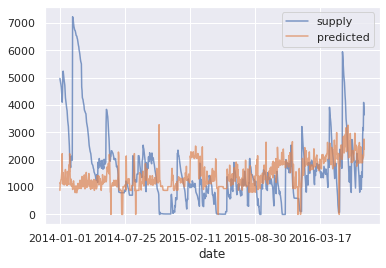

In [169]:
df_retail['predicted'] = lr.predict(X)
df_retail[['supply', 'predicted']].plot(alpha = 0.7);

In [170]:
#check feature importance
feature = pd.Series(lr.coef_, index = X.columns)
print(feature)

sales      4.180174
price    681.113499
dtype: float64


In [171]:
#check standard deviation error on model
np.random.seed(1)
err = np.std([lr.fit(*resample(X, y)).coef_
             for i in range(1000)], 0)

print(pd.DataFrame({'effect' : feature.round(0),
                   'error' : err.round(0)}))

       effect  error
sales     4.0    1.0
price   681.0   33.0


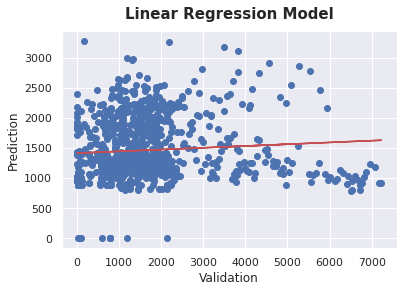

In [172]:
#visualize model
x = y
y = df_retail['predicted']

plt.title('Linear Regression Model', fontsize = 15, pad = 12, fontweight = 'bold')
plt.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color = 'r')
plt.xlabel('Validation', fontsize = 12)
plt.ylabel('Prediction', fontsize = 12)
plt.show()

In [173]:
#print model 
print("Model slope:", lr.coef_[0])
print("Model intecept:", lr.intercept_)

Model slope: 3.6753251344095346
Model intecept: 0.0


## Decision Tree Learning

### Gender Classification

In [174]:
#load dataset
df_fetal = pd.read_csv('/content/gender_classification_v7.csv')
df_fetal.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [175]:
#check missing value
df_fetal.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [176]:
#split data
X = df_fetal.drop('gender', axis = 1)
y = df_fetal['gender']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3750, 7)
(3750,)
(1251, 7)
(1251,)


In [177]:
#build decision tree classifier model
dtc = DecisionTreeClassifier(max_depth = 2, random_state = 0)
dtc.fit(X_train, y_train)
dtc.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtc.score(X_train, y_train)))
print("Accuracy on testing set: {:.3f}".format(dtc.score(X_test, y_test)))

Accuracy on training set: 0.883
Accuracy on testing set: 0.874


[Text(0.5, 0.8333333333333334, 'X[3] <= 0.5\ngini = 0.5\nsamples = 3750\nvalue = [1875, 1875]'),
 Text(0.25, 0.5, 'X[5] <= 0.5\ngini = 0.213\nsamples = 1895\nvalue = [1665, 230]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.034\nsamples = 1481\nvalue = [1455, 26]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.5\nsamples = 414\nvalue = [210, 204]'),
 Text(0.75, 0.5, 'X[4] <= 0.5\ngini = 0.201\nsamples = 1855\nvalue = [210, 1645]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.5\nsamples = 371\nvalue = [186, 185]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.032\nsamples = 1484\nvalue = [24, 1460]')]

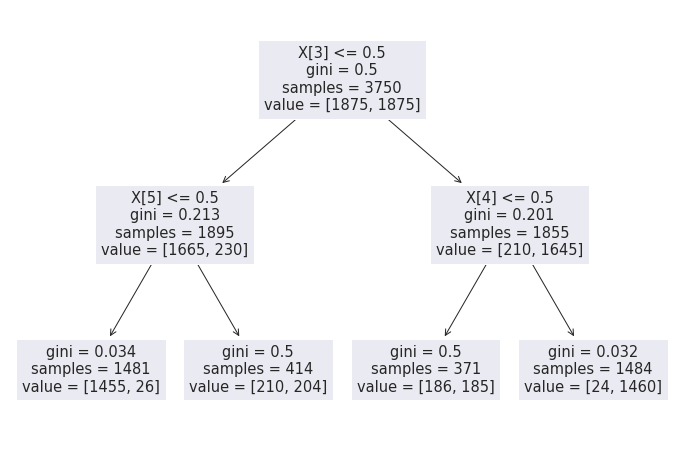

In [178]:
#visualize decision tree using tree plot
plt.figure(figsize=(12,8))
tree.plot_tree(dtc.fit(X_train, y_train)) 

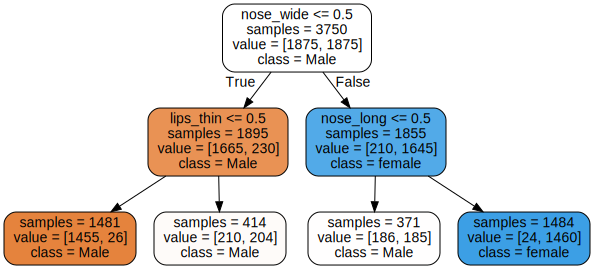

In [179]:
#visualize decision tree using graphviz
export_graphviz(dtc, out_file = "tree.dot", class_names = ["Male", "female"], feature_names = X_train.columns, impurity = False, filled = True, rounded = True)

with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

In [180]:
#check feature importance from model
print("Feature importances:\n{}".format(dtc.feature_importances_))

Feature importances:
[0.         0.         0.         0.79349178 0.10094425 0.10556397
 0.        ]


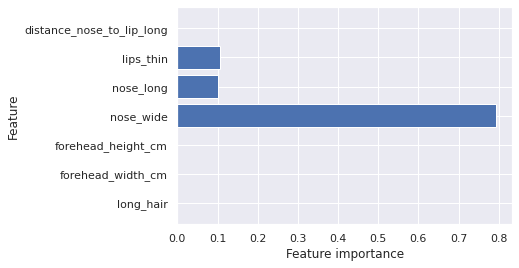

In [181]:
#define feature importance plot from model
def plot_feature_importances_gender(model):
  n_features = X_train.shape[1]
  plt.barh(range(n_features), model.feature_importances_, align = 'center')
  plt.yticks(np.arange(n_features), X_train.columns)
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")

#visualize feature importance
plot_feature_importances_gender(dtc)

In [182]:
#build random forest classifier model
rfc = RandomForestClassifier(n_estimators = 5, random_state = 2)
rfc.fit(X_train, y_train)
rfc.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rfc.score(X_train, y_train)))
print("Accuracy on testing set: {:.3f}".format(rfc.score(X_test, y_test)))

Accuracy on training set: 0.995
Accuracy on testing set: 0.965


In [183]:
#check feature importance
feature = pd.Series(rfc.feature_importances_, index = X_train.columns).sort_values(ascending = False)
print(feature)

distance_nose_to_lip_long    0.382001
nose_wide                    0.206785
lips_thin                    0.176877
nose_long                    0.086035
forehead_height_cm           0.079142
forehead_width_cm            0.067430
long_hair                    0.001729
dtype: float64


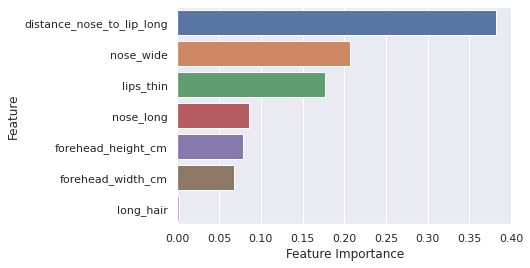

In [184]:
#visualize feature
sns.barplot(x = feature, y = feature.index)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()